<a href="https://colab.research.google.com/github/PhoniciaAnne/HSBC_Hackathon_AI-POWERED-FRAUD-DETECTION-SYSTEM/blob/main/HSBC_HACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


df = pd.read_csv('/content/train_hsbc_df.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB
None
                step         amount          fraud
count  513643.000000  513643.000000  513643.000000
mean       94.992629      37.915481       0.012071
std        51.063474     111.557455       0.109201
min         0.000000       0.000000       0.000000
25%        52.000000      13.740000       0.000000

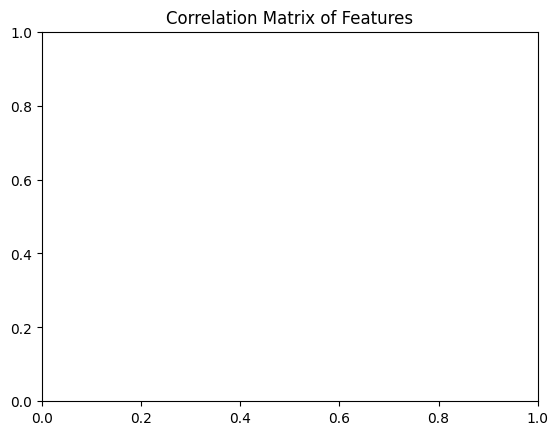

<ipython-input-2-0fc32a02513e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud', data=df, palette='Set1')


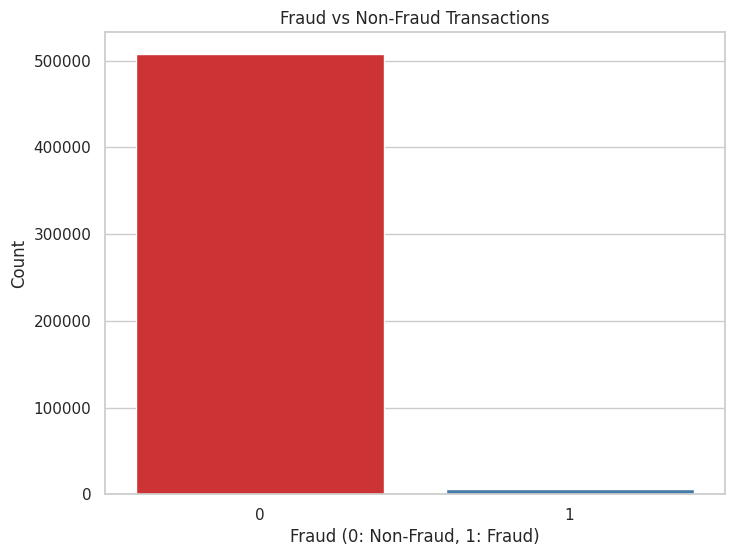

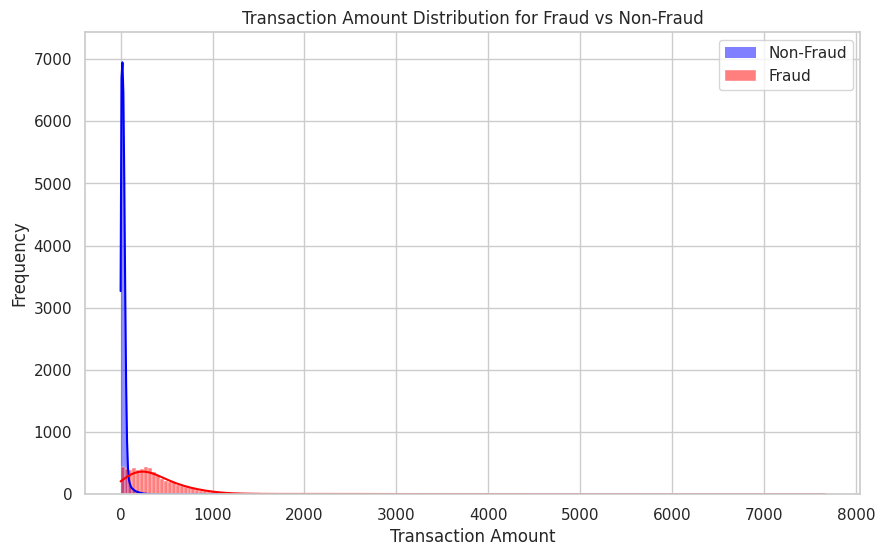

In [2]:
import matplotlib.pyplot as plt

plt.title('Correlation Matrix of Features')
plt.show()

import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=df, palette='Set1')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['fraud'] == 0]['amount'], color='blue', label='Non-Fraud', kde=True)
sns.histplot(df[df['fraud'] == 1]['amount'], color='red', label='Fraud', kde=True)
plt.title('Transaction Amount Distribution for Fraud vs Non-Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(columns=['fraud'])
y = df['fraud']


categorical_features = ['category', 'gender', 'merchant', 'age']


numeric_features = ['amount']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [4]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {pd.Series(y_train_resampled).value_counts()}")


Before SMOTE: fraud
0    355200
1      4350
Name: count, dtype: int64
After SMOTE: fraud
0    355200
1    355200
Name: count, dtype: int64


In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)




RandomForestClassifier(random_state=42)

In [6]:
best_rf_model = rf_model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', {0: 1, 1: 10}]  # Increase weight for fraud class
}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='precision', n_jobs=-1, verbose=2)


grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters for Precision:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
classifier.fit(X_train_resampled, y_train_resampled)
y_pred = classifier.predict(X_test_preprocessed)
y_prob = classifier.predict_proba(X_test_preprocessed)[:, 1]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



In [ ]:
#f1 score
from sklearn.metrics import f1_score

y_pred = best_rf_model.predict(X_test_preprocessed)


f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1:.2f}")


In [ ]:
#AOC
from sklearn.metrics import roc_auc_score


y_prob = best_rf_model.predict_proba(X_test_preprocessed)[:, 1]  )


roc_auc = roc_auc_score(y_test, y_prob)

print(f"AUC-ROC Score: {roc_auc:.2f}")


In [ ]:

predictions_df = pd.DataFrame({
    'transaction_id': X_test.index,
    'predicted_fraud': y_pred
})


predictions_df.to_csv('fraud_predictions.csv', index=False)

print("Predictions saved to fraud_predictions.csv")
